<a href="https://colab.research.google.com/github/BruceKent1/QML-AD-Project/blob/main/PennyLane_Codebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Exercise 1: Rescale alpha and beta so the length of the vector equals 1
---



In [ ]:
import numpy as np

In [ ]:
def normalise_state(alpha,beta):
# define the function that will take alpha and beta and return the normalised pair

    # Compute a normalized quantum state given arbitrary amplitudes.

    # Args:
    #     alpha (complex): Amplitude for |0>
    #     beta  (complex): Amplitude for |1>
    # Returns:
    #     np.array[complex]: [alpha', beta'] with |alpha'|^2 + |beta'|^2 = 1

      # step 1: Compute the length of new state, Length of vector (norm_squared)
      #  = sqr (abs aplha squared)+(abd beta squared)
      norm_sq = abs(alpha)**2 + abs(beta)**2
      # step 2: prevent the arbitirary number from being zero, extra check
      if norm_sq == 0:
        raise ValueError("amplitudes cannot be both zero")
      #step 3: define the norm term, the length which is the square root of norm squared term
      norm = np.sqrt(norm_sq)

      return np.array([alpha / norm, beta / norm], dtype=complex)
      # the function will return a vector of alpha over the length (norm) and beta over the norm
      # rescale the vector by the length so it is not more that one
      # we want to check if the rescale method actually works


      # alpha_prime = alpha/norm
      # beta_prime = beta/norm
      # return np.array([alpha_prime, beta_prime])
      # we can define it so it gives alpha prime abd beta prime


In [ ]:
alpha = 7+0j   # amplitude for |0>
beta  = 9+0j   # amplitude for |1>
# we tried random complex numbers to see


In [ ]:
state = normalise_state(alpha, beta)
print("Normalized state:", state)
# gave as the rescaled vector, the new state

Normalized state: [0.61394061+0.j 0.78935222+0.j]


In [ ]:
print("Check:", abs(state[0])**2 + abs(state[1])**2)
# check if equals to 1

Check: 1.0


<>:30: SyntaxWarning: invalid escape sequence '\p'
<>:31: SyntaxWarning: invalid escape sequence '\p'
<>:30: SyntaxWarning: invalid escape sequence '\p'
<>:31: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-2744799371.py:30: SyntaxWarning: invalid escape sequence '\p'
  ax.set_xlabel("Re($\psi$)")
/tmp/ipython-input-2744799371.py:31: SyntaxWarning: invalid escape sequence '\p'
  ax.set_ylabel("Im($\psi$)")


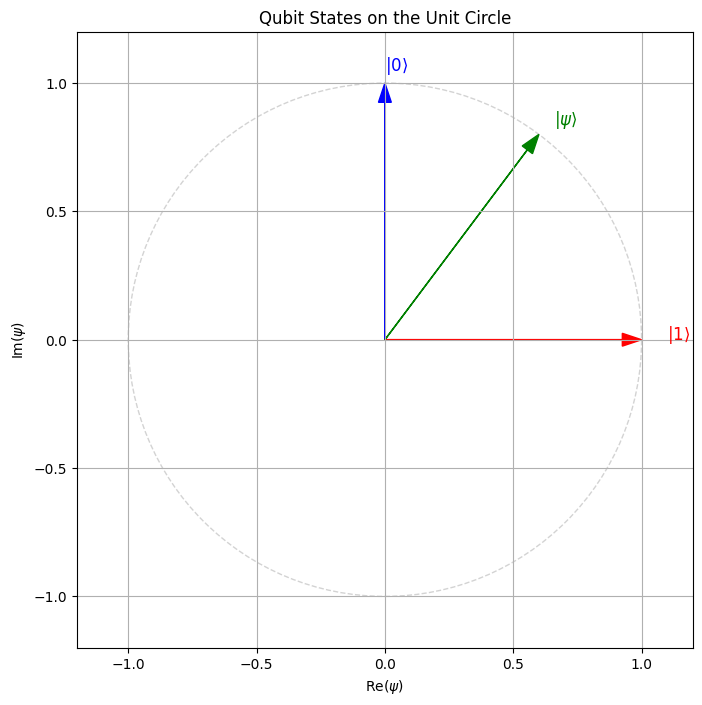

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 8))

# Draw unit circle (normalization condition)
circle = plt.Circle((0, 0), 1, color='lightgray', fill=False, linestyle='--')
ax.add_artist(circle)

# Define vectors for |0>, |1>, and an example superposition
ket_0 = np.array([0, 1])   # pointing "up"
ket_1 = np.array([1, 0])   # pointing "right"
psi = np.array([0.6, 0.8]) # normalized example (superposition)

# Draw arrows for states
ax.arrow(0, 0, ket_0[0], ket_0[1], head_width=0.05, color='blue', length_includes_head=True)
ax.text(ket_0[0]*1.1, ket_0[1]*1.05, r"$|0\rangle$", fontsize=12, color='blue')

ax.arrow(0, 0, ket_1[0], ket_1[1], head_width=0.05, color='red', length_includes_head=True)
ax.text(ket_1[0]*1.1, ket_1[1]*1.05, r"$|1\rangle$", fontsize=12, color='red')

ax.arrow(0, 0, psi[0], psi[1], head_width=0.05, color='green', length_includes_head=True)
ax.text(psi[0]*1.1, psi[1]*1.05, r"$|\psi\rangle$", fontsize=12, color='green')

# Formatting
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel("Re($\psi$)")
ax.set_ylabel("Im($\psi$)")
ax.set_title("Qubit States on the Unit Circle")
ax.grid(True)

plt.show()


Exercise 2:

In [ ]:
import numpy as np

def inner_product(state_1, state_2):
    """
    Compute the inner product between two quantum state vectors.
    ⟨state_1 | state_2⟩
    """
    # conjugate transpose of state_1 dotted with state_2
    return np.vdot(state_1, state_2)


# Test with |0> and |1>
ket_0 = np.array([1, 0], dtype=complex)
ket_1 = np.array([0, 1], dtype=complex)

print(f"<0|0> = {inner_product(ket_0, ket_0)}")  # should be 1
print(f"<0|1> = {inner_product(ket_0, ket_1)}")  # should be 0
print(f"<1|0> = {inner_product(ket_1, ket_0)}")  # should be 0
print(f"<1|1> = {inner_product(ket_1, ket_1)}")  # should be 1


<0|0> = (1+0j)
<0|1> = 0j
<1|0> = 0j
<1|1> = (1+0j)


excercise 3

In [ ]:
import numpy as np

def measure_state(state, num_meas):
    """
    Simulate quantum measurement outcomes.

    Args:
        state (np.array[complex]): [alpha, beta], normalized qubit state.
        num_meas (int): number of measurements.

    Returns:
        np.array[int]: list of 0/1 measurement outcomes.
    """

    # Step 1: compute probabilities from amplitudes
    # According to the Born rule:
    #   P(0) = |alpha|^2   (probability of measuring 0)
    #   P(1) = |beta|^2    (probability of measuring 1)
    # Here abs(state[i]) gives |alpha| or |beta|,
    # and abs(...)**2 gives |alpha|^2 or |beta|^2
    probs = [abs(state[0])**2, abs(state[1])**2]

    # Step 2: simulate measurement outcomes
    # np.random.choice selects random values from [0,1],
    #   - 'size=num_meas' means repeat the process 'num_meas' times
    #   - 'p=probs' sets the probability weights (P(0), P(1))
    # So each measurement result will be 0 with probability P(0),
    # and 1 with probability P(1).
    outcomes = np.random.choice([0, 1], size=num_meas, p=probs)

    # Step 3: return the array of outcomes
    return outcomes


# -------------------------------
# Example test
# -------------------------------

# Define a quantum state:
# |ψ⟩ = 0.8|0⟩ + 0.6|1⟩
# This is already normalized, since:
#   |0.8|^2 + |0.6|^2 = 0.64 + 0.36 = 1
state = np.array([0.8, 0.6])

# Simulate 10 measurements
# Each result is either 0 or 1, chosen with probabilities [0.64, 0.36]
outcomes = measure_state(state, 10)

print("Measurement outcomes (10 shots):", outcomes)


# -------------------------------
# Extended test: more measurements
# -------------------------------

# Run 1000 measurements to see probabilities emerge
outcomes_large = measure_state(state, 1000)

# Count how many 0's and 1's appeared
count_0 = np.sum(outcomes_large == 0)
count_1 = np.sum(outcomes_large == 1)

# Convert counts to relative frequencies
freq_0 = count_0 / 1000
freq_1 = count_1 / 1000

print(f"Counts: 0 → {count_0}, 1 → {count_1}")
print(f"Frequencies (approximate probabilities): 0 → {freq_0:.2f}, 1 → {freq_1:.2f}")
print(f"Theoretical probabilities: 0 → {abs(state[0])**2}, 1 → {abs(state[1])**2}")


Measurement outcomes (10 shots): [0 0 0 0 1 1 0 1 1 0]
Counts: 0 → 667, 1 → 333
Frequencies (approximate probabilities): 0 → 0.67, 1 → 0.33
Theoretical probabilities: 0 → 0.6400000000000001, 1 → 0.36


In [ ]:
import numpy as np
from numpy import random

alpha, beta = 0.8, 0.6
probs = [abs(alpha)**2, abs(beta)**2]  # [0.64, 0.36]
r = random.rand(5)                  # 5 random numbers in [0,1)
outcomes = (r >= probs[0]).astype(int) # 0 if r<0.64 else 1
print("r:", np.round(r, 3))
print("outcomes:", outcomes.tolist())


r: [0.924 0.553 0.311 0.892 0.825]
outcomes: [1, 0, 0, 1, 1]


In [ ]:
# r is the trial itself, the time that you roll the dice, it is a random number between 0 and 1
# but it decides how the superposition goint to collapse into

## example 4